In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Case Study Rakamin/Study Case DA.xlsx', sheet_name=None)
sheet_names = list(df.keys())
for name in sheet_names:
    print(name)

Talent Variable (TV) & Talent G
dim_companies
dim_areas
dim_positions
dim_departments
dim_divisions
dim_directorates
dim_grades
dim_education
dim_majors
dim_competency_pillars
employees
profiles_psych
papi_scores
strengths
performance_yearly
competencies_yearly


# **Step 1 - Discover the Pattern of Success**

In [4]:
# Sheet competencies_yearly (Competency pillars)
df1 = df['competencies_yearly']

# Check null data
print(df1.isnull().sum())
df1.head()

employee_id        0
score          10791
pillar_code        0
year               0
dtype: int64


,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021


In [5]:
# Fill null data with median based on same pillar_code
df1['score'] = df1.groupby('pillar_code')['score'].transform(lambda x: x.fillna(x.median())).astype(int)

# Change score 6 and 99 to 5 (assumption that the rating is maximum)
df1['score'] = df1['score'].replace([6, 99], 5).astype(int)

# Check null data
print(df1.isnull().sum())
df1.head()

employee_id    0
score          0
pillar_code    0
year           0
dtype: int64


,employee_id,score,pillar_code,year
0,EMP100000,2,GDR,2021
1,EMP100001,3,GDR,2021
2,EMP100002,1,GDR,2021
3,EMP100003,3,GDR,2021
4,EMP100004,3,GDR,2021


In [67]:
# Save to CSV
#df1.to_csv("df1.csv", index=False)

In [6]:
# Sheet dim_competency_pillars (Competency pillars)
df2 = df['dim_competency_pillars']
df2

,pillar_code,pillar_label
0,GDR,Growth Drive & Resilience
1,CEX,Curiosity & Experimentation
2,IDS,Insight & Decision Sharpness
3,QDD,Quality Delivery Discipline
4,STO,Synergy & Team Orientation
5,SEA,Social Empathy & Awareness
6,VCU,Value Creation for Users
7,LIE,"Lead, Inspire & Empower"
8,FTC,Forward Thinking & Clarity
9,CSI,Commercial Savvy & Impact


In [7]:
# Sheet papi_scores (Psychometric profiles)
df3 = df['papi_scores']

# Check null data
print(df3.isnull().sum())
df3.head()

employee_id       0
scale_code        0
score          3203
dtype: int64


,employee_id,scale_code,score
0,EMP100000,Papi_N,2.0
1,EMP100001,Papi_N,8.0
2,EMP100002,Papi_N,9.0
3,EMP100003,Papi_N,9.0
4,EMP100004,Papi_N,7.0


In [8]:
# Fill null data with median based on same pillar_code
df3['score'] = df3.groupby('scale_code')['score'].transform(lambda x: x.fillna(x.median())).astype(int)

# Check null data
print(df3.isnull().sum())
df3.head()

employee_id    0
scale_code     0
score          0
dtype: int64


,employee_id,scale_code,score
0,EMP100000,Papi_N,2
1,EMP100001,Papi_N,8
2,EMP100002,Papi_N,9
3,EMP100003,Papi_N,9
4,EMP100004,Papi_N,7


In [68]:
# Save to CSV
#df3.to_csv("df3.csv", index=False)

In [9]:
# Sheet profiles_psych (Psychometric profiles)
df4 = df['profiles_psych']

# Check null data
print(df4.isnull().sum())
df4.head()

employee_id      0
pauli            0
faxtor           0
disc           171
disc_word        0
mbti           149
iq             456
gtq            332
tiki             0
dtype: int64


,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3
2,EMP100002,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3
4,EMP100004,75,100,NaN,Steadiness-Conscientious,INTJ,134.0,21.0,9


In [10]:
# Fill disc with the abbreviation of disc_word
mapping_disc = {
    'Steadiness-Influencer': 'SI',
    'Dominant-Steadiness': 'DS',
    'Dominant-Conscientious': 'DC',
    'Steadiness-Conscientious': 'SC',
    'Influencer-Dominant': 'ID',
    'Conscientious-Influencer': 'CI',
    'Dominant-Influencer': 'DI',
    'Influencer-Conscientious': 'IC',
    'Conscientious-Steadiness': 'CS',
    'Conscientious-Dominant': 'CD',
    'Influencer-Steadiness': 'IS',
    'Steadiness-Dominant': 'SD'}
disc_blank = df4['disc'].isnull()
df4.loc[disc_blank, 'disc'] = df4.loc[disc_blank, 'disc_word'].map(mapping_disc)

# Fill mbti with mode based on same disc
df4['mbti'] = df4.groupby('disc')['mbti'].transform(lambda x: x.fillna(x.mode()[0]))

# Fill iq with average
df4['iq'] = df4['iq'].fillna(df4['iq'].mean()).astype(int)

# Fill gtq with average
df4['gtq'] = df4['gtq'].fillna(df4['gtq'].mean()).astype(int)

# Change "inftj" to "INFJ"; "enfp" to "ENFP"; "Istp" to "ISTP"
df4['mbti'] = df4['mbti'].replace('inftj', 'INFJ')
df4['mbti'] = df4['mbti'].replace('enfp', 'ENFP')
df4['mbti'] = df4['mbti'].replace('Istp', 'ISTP')

# Check null data
print(df4.isnull().sum())
df4.head()

employee_id    0
pauli          0
faxtor         0
disc           0
disc_word      0
mbti           0
iq             0
gtq            0
tiki           0
dtype: int64


,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,ENFP,94,33,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94,17,3
2,EMP100002,66,38,DC,Dominant-Conscientious,ISTP,109,20,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85,39,3
4,EMP100004,75,100,SC,Steadiness-Conscientious,INTJ,134,21,9


In [69]:
# Save to CSV
#df4.to_csv("df4.csv", index=False)

In [11]:
# Sheet  strengths (Behavioral data)
df5 = df['strengths']
df5.head()

,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative


In [12]:
# Sheet  dim_grades
df6 = df['dim_grades']
df6

,grade_id,name
0,1,III
1,2,IV
2,3,V


In [13]:
# Sheet  dim_education
df7 = df['dim_education']
df7

,education_id,name
0,1,D3
1,2,S1
2,3,S2
3,4,SMA


In [14]:
# Sheet  employees (Contextual factors -> grade , years_of_service_months , education , etc.)
df8 = df['employees']

# Check null data
print(df8.isnull().sum())
df8.head()

employee_id                0
fullname                   0
nip                        0
company_id                 0
area_id                    0
position_id                0
department_id              0
division_id                0
directorate_id             0
grade_id                   0
education_id               0
major_id                   0
years_of_service_months    0
dtype: int64


,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


In [15]:
# Sheet  performance_yearly (High performers = rating 5)
df9 = df['performance_yearly']

# Check null data
print(df9.isnull().sum())
df9.head()

employee_id       0
rating         1108
year              0
dtype: int64


,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021


In [16]:
# Fill rating with median based on same year
df9['rating'] = df9.groupby('year')['rating'].transform(lambda x: x.fillna(x.median())).astype(int)

# Change rating 6 and 99 to 5 (assumption that the rating is maximum)
df9['rating'] = df9['rating'].replace([6, 99], 5).astype(int)

# Check null data
print(df9.isnull().sum())
df9.head()

employee_id    0
rating         0
year           0
dtype: int64


,employee_id,rating,year
0,EMP100000,2,2021
1,EMP100001,3,2021
2,EMP100002,2,2021
3,EMP100003,3,2021
4,EMP100004,3,2021


In [70]:
# Save to CSV
#df9.to_csv("df9.csv", index=False)

## **Relationship Between Performance Rating & Competency Pillars**

In [17]:
# Merge column
df9a = df9[['employee_id','rating','year']]
df1a = df1[['employee_id','pillar_code','score','year']]
merged_1 = df1a.merge(df9a[['employee_id','rating','year']],
                   on=['employee_id','year'],
                   how='left')
merged_1.head()

,employee_id,pillar_code,score,year,rating
0,EMP100000,GDR,2,2021,2
1,EMP100001,GDR,3,2021,3
2,EMP100002,GDR,1,2021,2
3,EMP100003,GDR,3,2021,3
4,EMP100004,GDR,3,2021,3


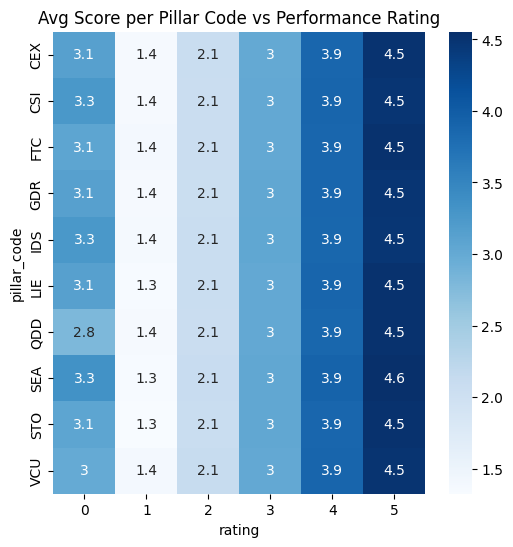

In [18]:
# Heatmap (pilar_code consideration)
pivot_1 = merged_1.pivot_table(index=['pillar_code'],columns='rating',values='score',aggfunc='mean')
plt.figure(figsize=(6,6))
sns.heatmap(pivot_1, annot=True, cmap='Blues')
plt.title('Avg Score per Pillar Code vs Performance Rating')
plt.show()

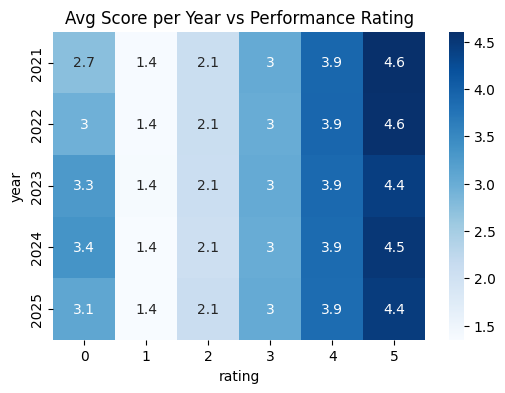

In [19]:
# Heatmap (year consideration)
pivot_1 = merged_1.pivot_table(index=['year'],columns='rating',values='score',aggfunc='mean')
plt.figure(figsize=(6,4))
sns.heatmap(pivot_1, annot=True, cmap='Blues')
plt.title('Avg Score per Year vs Performance Rating')
plt.show()

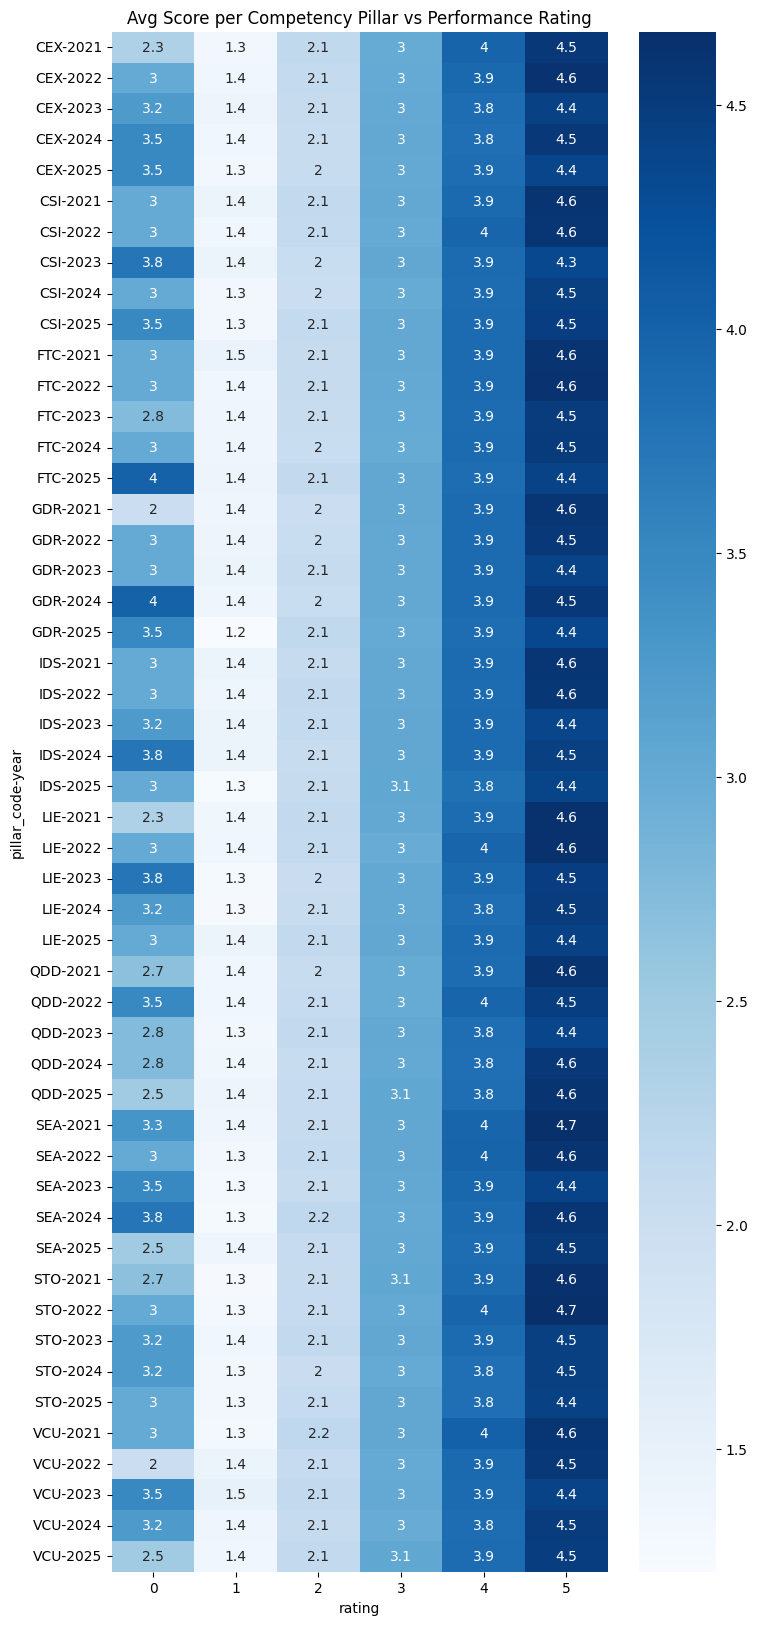

In [20]:
# Heatmap (pilar_code consideration)
pivot_1 = merged_1.pivot_table(index=['pillar_code', 'year'],columns='rating',values='score',aggfunc='mean')
plt.figure(figsize=(8,20))
sns.heatmap(pivot_1, annot=True, cmap='Blues')
plt.title('Avg Score per Competency Pillar vs Performance Rating')
plt.show()

Intercept: -12.045086119281812

Coefficients:
pillar_code    0.000000
score          0.678837
year           0.006456
dtype: float64

Regression Equation:
rating = -12.0451 + 0.0000*pillar_code + 0.6788*score + 0.0065*year

Model Evaluation:
R² Score: 0.5524
Mean Squared Error: 0.4578


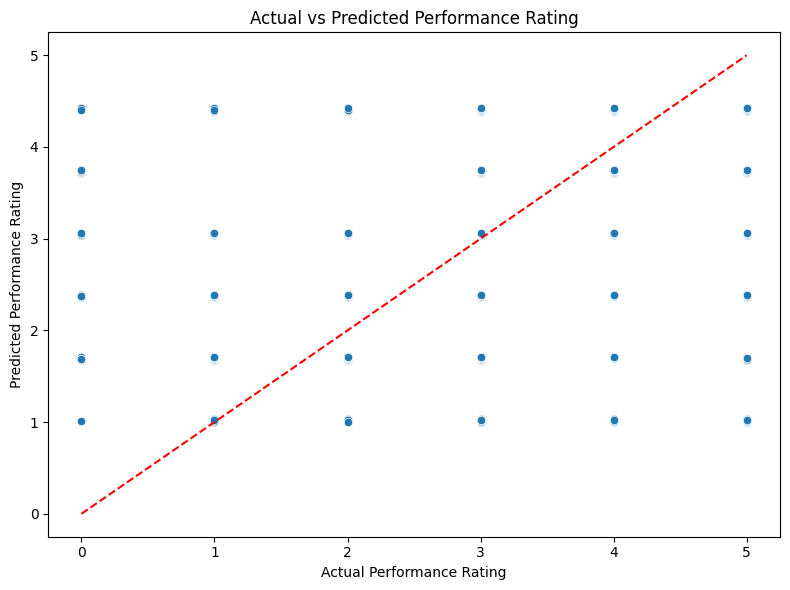

In [21]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg_1 = merged_1
numeric_cols = merged_1.drop(columns=['employee_id']).apply(pd.to_numeric, errors='coerce')

X = numeric_cols.drop(columns=['rating']).fillna(0)
y = numeric_cols['rating']

model = LinearRegression()
model.fit(X, y)
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_
regression_equation = f"rating = {intercept:.4f}"
for col, coef in coefficients.items():
    sign = '+' if coef >= 0 else '-'
    regression_equation += f" {sign} {abs(coef):.4f}*{col}"

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("Intercept:", intercept)
print("\nCoefficients:")
print(coefficients)
print("\nRegression Equation:")
print(regression_equation)
print("\nModel Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Performance Rating")
plt.ylabel("Predicted Performance Rating")
plt.title("Actual vs Predicted Performance Rating")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

## **Relationship Between Performance Rating & Psychometric Profiles**

In [22]:
# Merge column (papi_scores)
df9a = df9[['employee_id','rating']]
df3a = df3[['employee_id','scale_code','score']]
merged_2 = df3a.merge(df9a[['employee_id','rating']],
                   on=['employee_id'],
                   how='left')
merged_2.head()

,employee_id,scale_code,score,rating
0,EMP100000,Papi_N,2,2
1,EMP100000,Papi_N,2,3
2,EMP100000,Papi_N,2,1
3,EMP100000,Papi_N,2,3
4,EMP100000,Papi_N,2,3


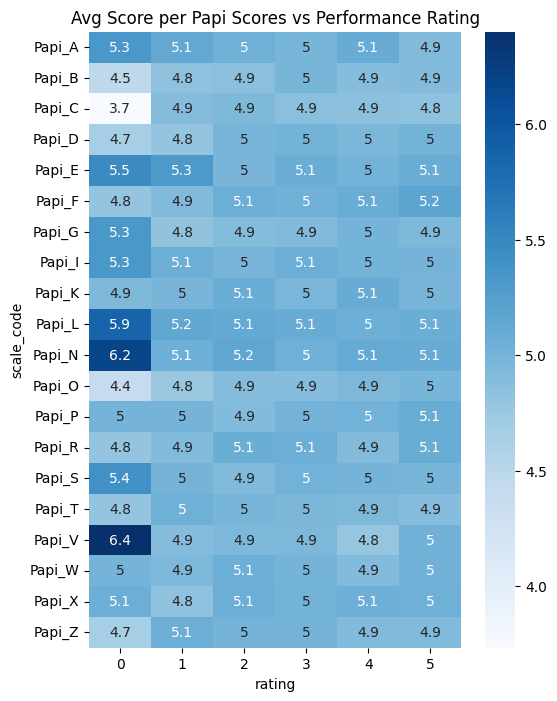

In [23]:
# Heatmap (papi_scores consideration)
pivot_2 = merged_2.pivot_table(index=['scale_code'],columns='rating',values='score',aggfunc='mean')
plt.figure(figsize=(6,8))
sns.heatmap(pivot_2, annot=True, cmap='Blues')
plt.title('Avg Score per Papi Scores vs Performance Rating')
plt.show()

Intercept: 3.125670454108254

Coefficients:
scale_code    0.00000
score         0.00018
dtype: float64

Regression Equation:
rating = 3.1257 + 0.0000*scale_code + 0.0002*score

Model Evaluation:
R² Score: 0.0000
Mean Squared Error: 1.0230


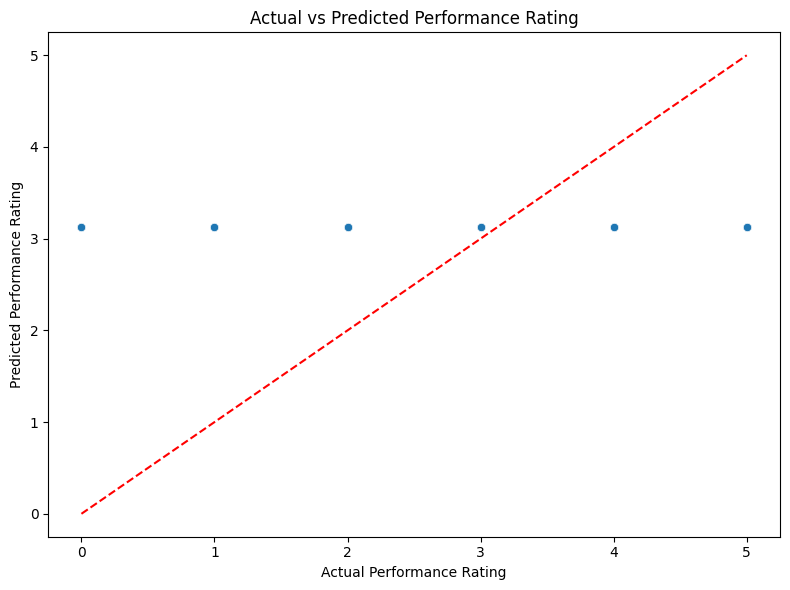

In [24]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg_2 = merged_2
numeric_cols = merged_2.drop(columns=['employee_id']).apply(pd.to_numeric, errors='coerce')

X = numeric_cols.drop(columns=['rating']).fillna(0)
y = numeric_cols['rating']

model = LinearRegression()
model.fit(X, y)
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_
regression_equation = f"rating = {intercept:.4f}"
for col, coef in coefficients.items():
    sign = '+' if coef >= 0 else '-'
    regression_equation += f" {sign} {abs(coef):.4f}*{col}"

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("Intercept:", intercept)
print("\nCoefficients:")
print(coefficients)
print("\nRegression Equation:")
print(regression_equation)
print("\nModel Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Performance Rating")
plt.ylabel("Predicted Performance Rating")
plt.title("Actual vs Predicted Performance Rating")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

In [25]:
# Merge column (profiles_psych)
df9a = df9[['employee_id','rating']]
df4a = df4[['employee_id','pauli','faxtor','iq','gtq','tiki']]
merged_3 = df4a.merge(df9a[['employee_id','rating']],
                   on=['employee_id'],
                   how='left')
merged_3.head()

,employee_id,pauli,faxtor,iq,gtq,tiki,rating
0,EMP100000,86,75,94,33,2,2
1,EMP100000,86,75,94,33,2,3
2,EMP100000,86,75,94,33,2,1
3,EMP100000,86,75,94,33,2,3
4,EMP100000,86,75,94,33,2,3


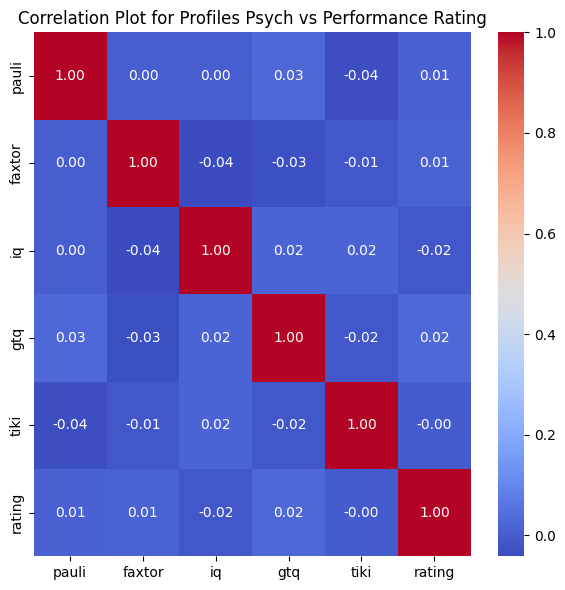

In [26]:
# Correlation Plot (profiles_psych consideration)
numeric_cols = merged_3.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot for Profiles Psych vs Performance Rating')
plt.tight_layout()
plt.show()

Intercept: 3.075859182614873

Coefficients:
pauli     0.000279
faxtor    0.000497
iq       -0.000995
gtq       0.004324
tiki     -0.001009
dtype: float64

Regression Equation:
rating = 3.0759 + 0.0003*pauli + 0.0005*faxtor - 0.0010*iq + 0.0043*gtq - 0.0010*tiki

Model Evaluation:
R² Score: 0.0010
Mean Squared Error: 1.0219


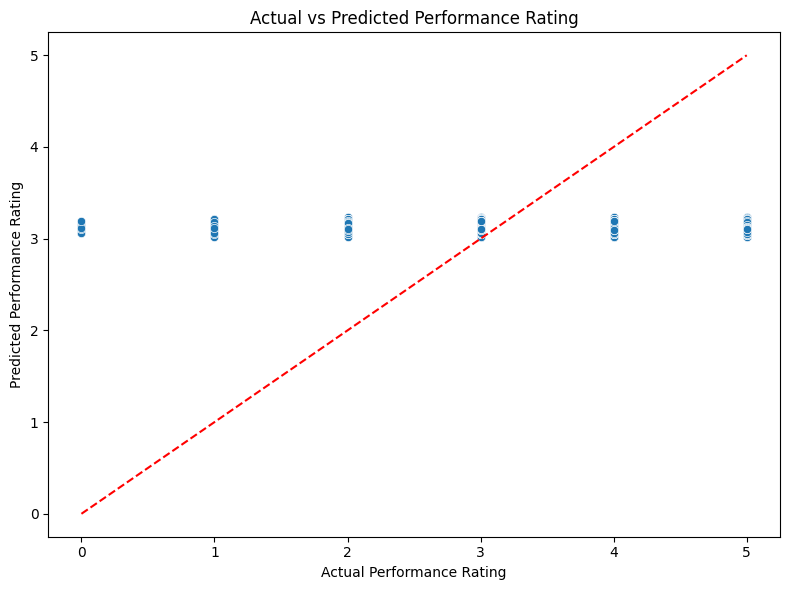

In [27]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg_3 = merged_3
numeric_cols = merged_3.drop(columns=['employee_id']).apply(pd.to_numeric, errors='coerce')

X = numeric_cols.drop(columns=['rating']).fillna(0)
y = numeric_cols['rating']

model = LinearRegression()
model.fit(X, y)
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_
regression_equation = f"rating = {intercept:.4f}"
for col, coef in coefficients.items():
    sign = '+' if coef >= 0 else '-'
    regression_equation += f" {sign} {abs(coef):.4f}*{col}"

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("Intercept:", intercept)
print("\nCoefficients:")
print(coefficients)
print("\nRegression Equation:")
print(regression_equation)
print("\nModel Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Performance Rating")
plt.ylabel("Predicted Performance Rating")
plt.title("Actual vs Predicted Performance Rating")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

In [28]:
# Merge column (profiles_psych)
df9b = df9[['employee_id','rating']]
df4b = df4[['employee_id','disc','mbti']]
merged_4 = df4b.merge(df9b[['employee_id','rating']],
                   on=['employee_id'],
                   how='left')

# Codification
merged_4['disc'] = pd.factorize(merged_4['disc'])[0] + 1
merged_4['mbti'] = pd.factorize(merged_4['mbti'])[0] + 1
merged_4.head()

,employee_id,disc,mbti,rating
0,EMP100000,1,1,2
1,EMP100000,1,1,3
2,EMP100000,1,1,1
3,EMP100000,1,1,3
4,EMP100000,1,1,3


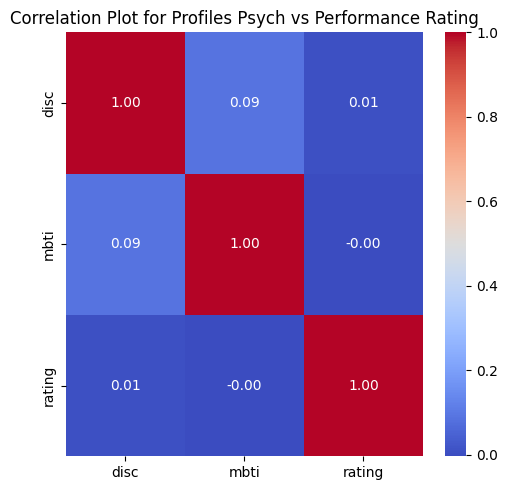

In [29]:
# Correlation Plot (profiles_psych consideration)
numeric_cols = merged_4.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot for Profiles Psych vs Performance Rating')
plt.tight_layout()
plt.show()

Intercept: 3.120534291299579

Coefficients:
disc    0.001906
mbti   -0.000767
dtype: float64

Regression Equation:
rating = 3.1205 + 0.0019*disc - 0.0008*mbti

Model Evaluation:
R² Score: 0.0001
Mean Squared Error: 1.0229


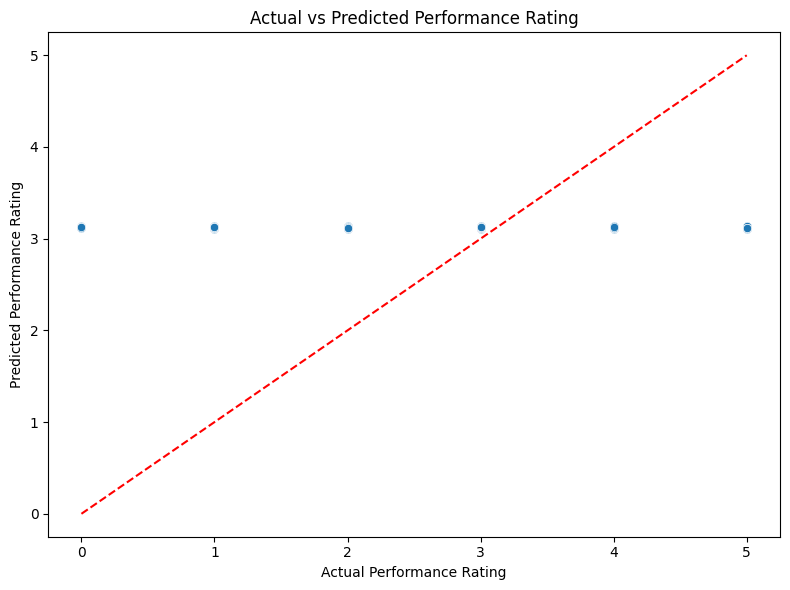

In [30]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg_4 = merged_4
numeric_cols = merged_4.drop(columns=['employee_id']).apply(pd.to_numeric, errors='coerce')

X = numeric_cols.drop(columns=['rating']).fillna(0)
y = numeric_cols['rating']

model = LinearRegression()
model.fit(X, y)
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_
regression_equation = f"rating = {intercept:.4f}"
for col, coef in coefficients.items():
    sign = '+' if coef >= 0 else '-'
    regression_equation += f" {sign} {abs(coef):.4f}*{col}"

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("Intercept:", intercept)
print("\nCoefficients:")
print(coefficients)
print("\nRegression Equation:")
print(regression_equation)
print("\nModel Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Performance Rating")
plt.ylabel("Predicted Performance Rating")
plt.title("Actual vs Predicted Performance Rating")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

## **Relationship Between Performance Rating & Behavioral Data**

In [31]:
# Merge column (strengths)
df9a = df9[['employee_id','rating']]
df5a = df5[['employee_id','rank','theme']]
merged_5a = df5a.merge(df9a[['employee_id','rating']],
                   on=['employee_id'],
                   how='left')

# Transpose data using pivot
pivot_5 = merged_5a.pivot_table(index='employee_id',columns='theme',values='rank',aggfunc='first',fill_value=np.nan)
pivot_5 = pivot_5.reset_index()

# Convert all strength columns to numeric and fill NaN with 0
strength_columns_for_pivot = pivot_5.columns.drop(['employee_id'])
pivot_5[strength_columns_for_pivot] = pivot_5[strength_columns_for_pivot].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Calculate rating per employee_id using median
rating = merged_5a.groupby('employee_id')['rating'].median().reset_index()
rating.rename(columns={'rating': 'rating'}, inplace=True)
rating['rating'] = rating['rating'].round().astype(int)

# Combine with pivot data
merged_5a = pivot_5.merge(rating, on='employee_id', how='left')
merged_5a.head()

,employee_id,Achiever,Activator,Adaptability,Analytical,Arranger,Belief,Command,Communication,Competition,...,Maximizer,Positivity,Relator,Responsibility,Restorative,Self-Assurance,Significance,Strategic,Woo,rating
0,DUP1942,0,0,0,0,0,6,0,12,0,...,2,11,0,0,5,0,8,0,14,3
1,DUP2096,11,6,0,0,0,0,1,0,3,...,0,0,0,0,0,0,2,8,5,3
2,DUP2722,0,8,0,4,0,9,0,0,0,...,12,11,0,0,0,2,13,0,0,3
3,DUP3015,0,0,0,0,12,0,6,4,0,...,0,14,13,1,0,0,0,10,0,4
4,DUP3452,0,0,9,0,2,0,0,12,0,...,6,0,13,0,0,3,8,14,0,3


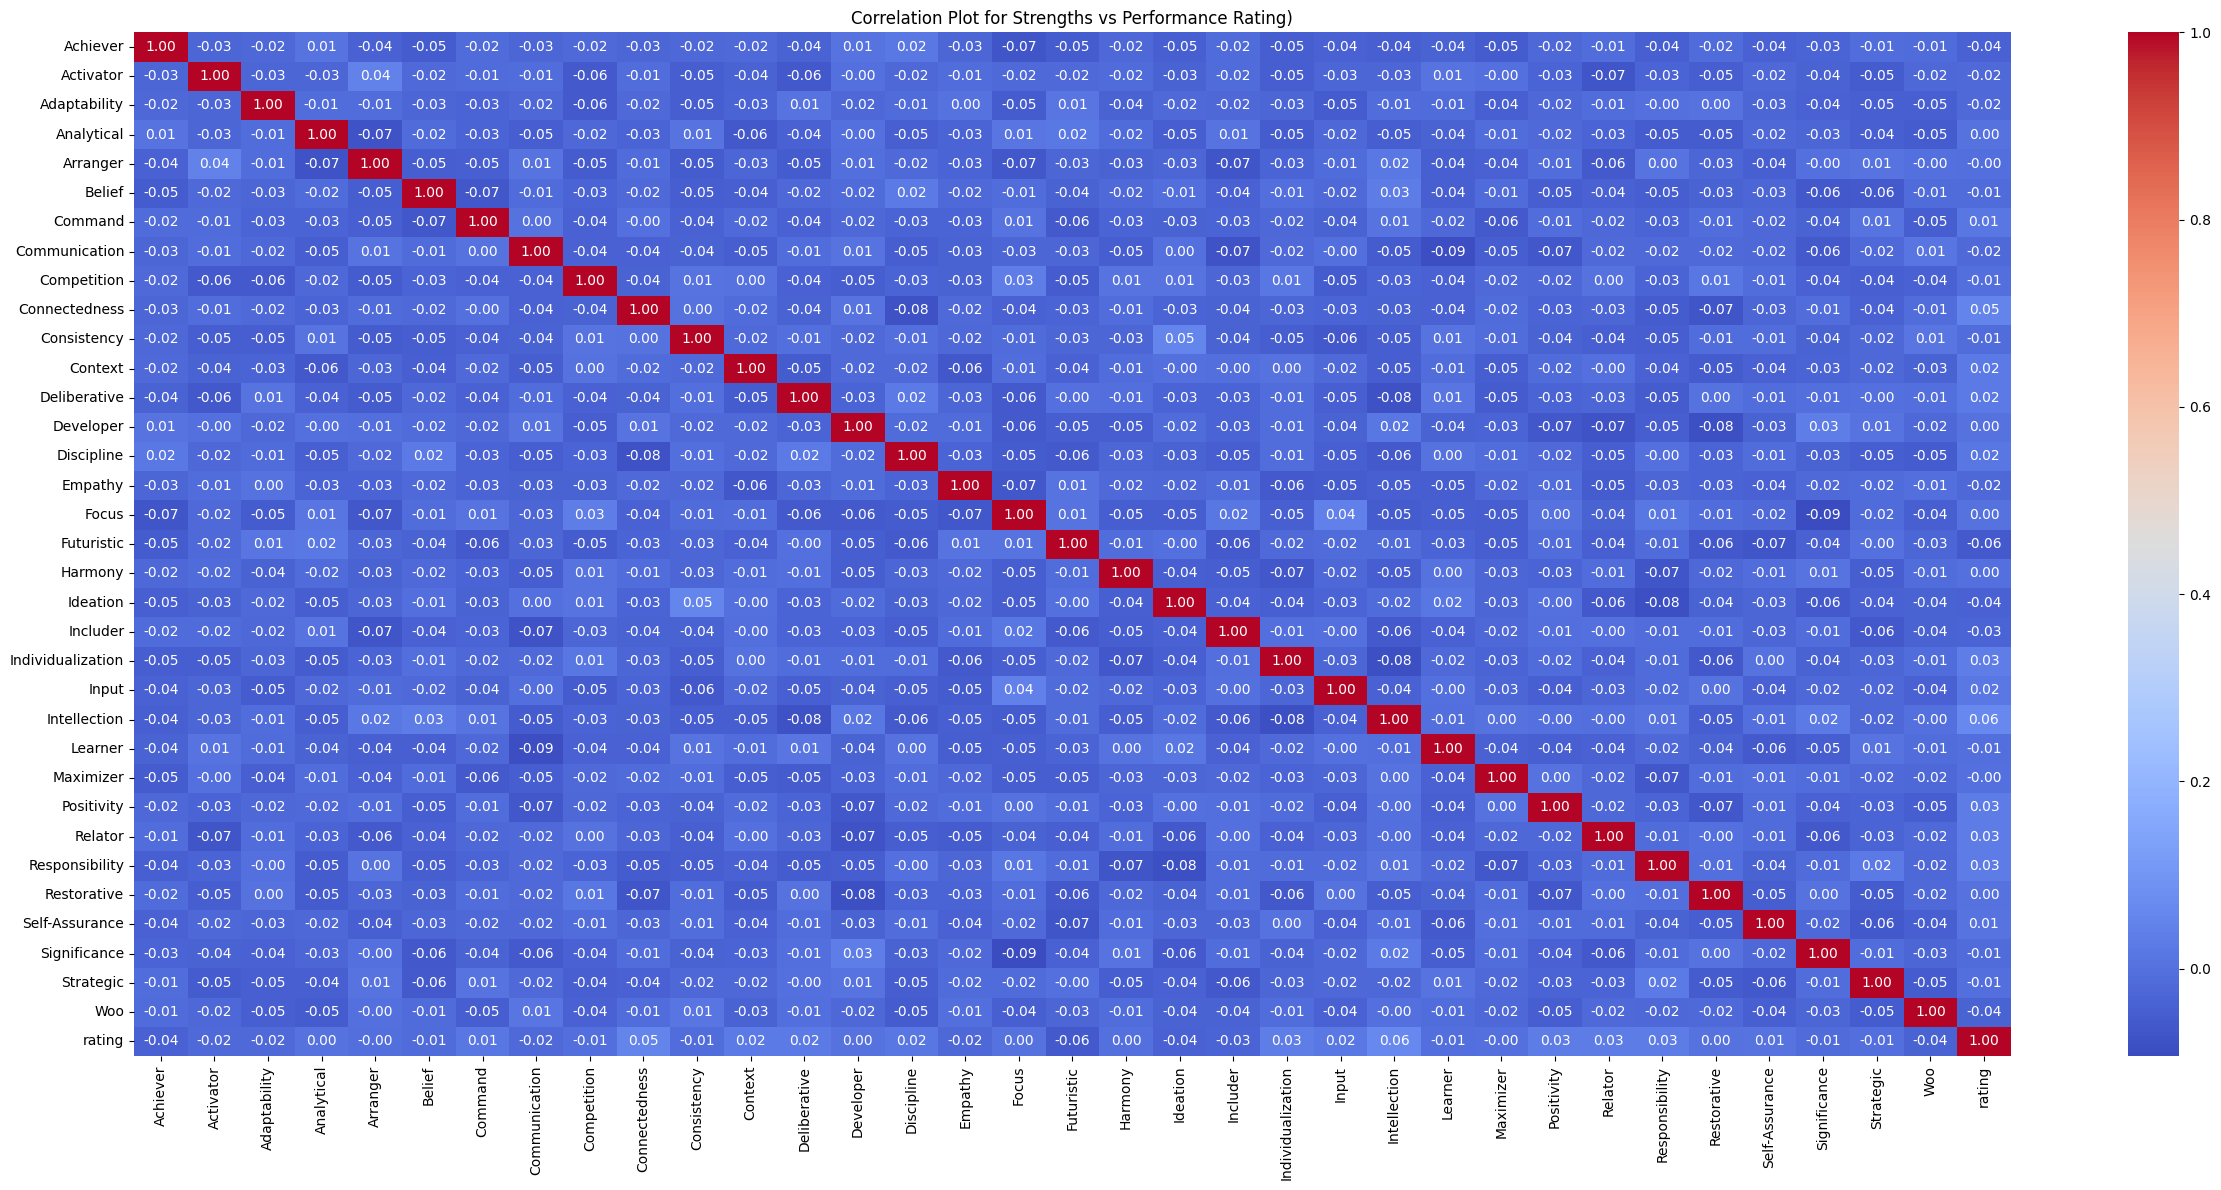

In [32]:
# Correlation Plot (strenghts consideration)
numeric_cols = merged_5a.drop(columns=['employee_id']).apply(pd.to_numeric, errors='coerce')
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(25,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot for Strengths vs Performance Rating)')
plt.tight_layout()
plt.show()

Intercept: 3.14567151470373

Coefficients:
Achiever            -0.004873
Activator           -0.002161
Adaptability        -0.002638
Analytical           0.001089
Arranger            -0.000902
Belief              -0.002239
Command              0.000915
Communication       -0.001890
Competition         -0.001432
Connectedness        0.006673
Consistency         -0.000810
Context              0.002779
Deliberative         0.003706
Developer            0.000145
Discipline           0.002238
Empathy             -0.001900
Focus                0.000295
Futuristic          -0.007568
Harmony              0.000316
Ideation            -0.004657
Includer            -0.004246
Individualization    0.004090
Input                0.002784
Intellection         0.008495
Learner             -0.001102
Maximizer           -0.000652
Positivity           0.003255
Relator              0.002970
Responsibility       0.003169
Restorative          0.000568
Self-Assurance      -0.000250
Significance        -0.0026

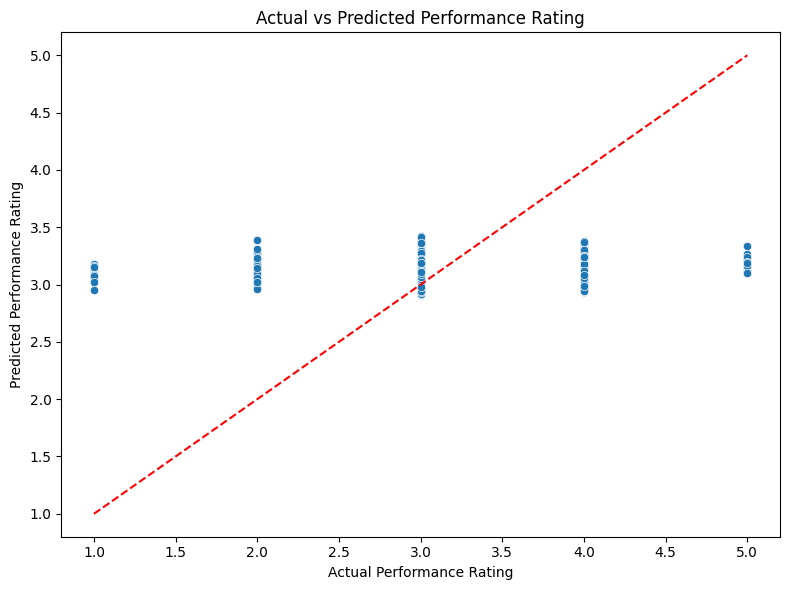

In [33]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg_5 = merged_5a
numeric_cols = merged_5a.drop(columns=['employee_id']).apply(pd.to_numeric, errors='coerce')

X = numeric_cols.drop(columns=['rating']).fillna(0)
y = numeric_cols['rating']

model = LinearRegression()
model.fit(X, y)
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_
regression_equation = f"rating = {intercept:.4f}"
for col, coef in coefficients.items():
    sign = '+' if coef >= 0 else '-'
    regression_equation += f" {sign} {abs(coef):.4f}*{col}"

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("Intercept:", intercept)
print("\nCoefficients:")
print(coefficients)
print("\nRegression Equation:")
print(regression_equation)
print("\nModel Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Performance Rating")
plt.ylabel("Predicted Performance Rating")
plt.title("Actual vs Predicted Performance Rating")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

In [34]:
# Inverse data
merged_5b = merged_5a.copy()
max_rank = 14
strength_columns = merged_5b.columns[1:]
merged_5b[strength_columns] = merged_5b[strength_columns].apply(pd.to_numeric, errors='coerce')
merged_5b[strength_columns] = merged_5b[strength_columns].apply(
    lambda col: col.map(lambda x: (max_rank + 1) - x if pd.notnull(x) else x))
merged_5b[strength_columns] = merged_5b[strength_columns].fillna(0).astype(int).replace(0, "")
merged_5b.head()

,employee_id,Achiever,Activator,Adaptability,Analytical,Arranger,Belief,Command,Communication,Competition,...,Maximizer,Positivity,Relator,Responsibility,Restorative,Self-Assurance,Significance,Strategic,Woo,rating
0,DUP1942,15,15,15,15,15,9,15,3,15,...,13,4,15,15,10,15,7,15,1,12
1,DUP2096,4,9,15,15,15,15,14,15,12,...,15,15,15,15,15,15,13,7,10,12
2,DUP2722,15,7,15,11,15,6,15,15,15,...,3,4,15,15,15,13,2,15,15,12
3,DUP3015,15,15,15,15,3,15,9,11,15,...,15,1,2,14,15,15,15,5,15,11
4,DUP3452,15,15,6,15,13,15,15,3,15,...,9,15,2,15,15,12,7,1,15,12


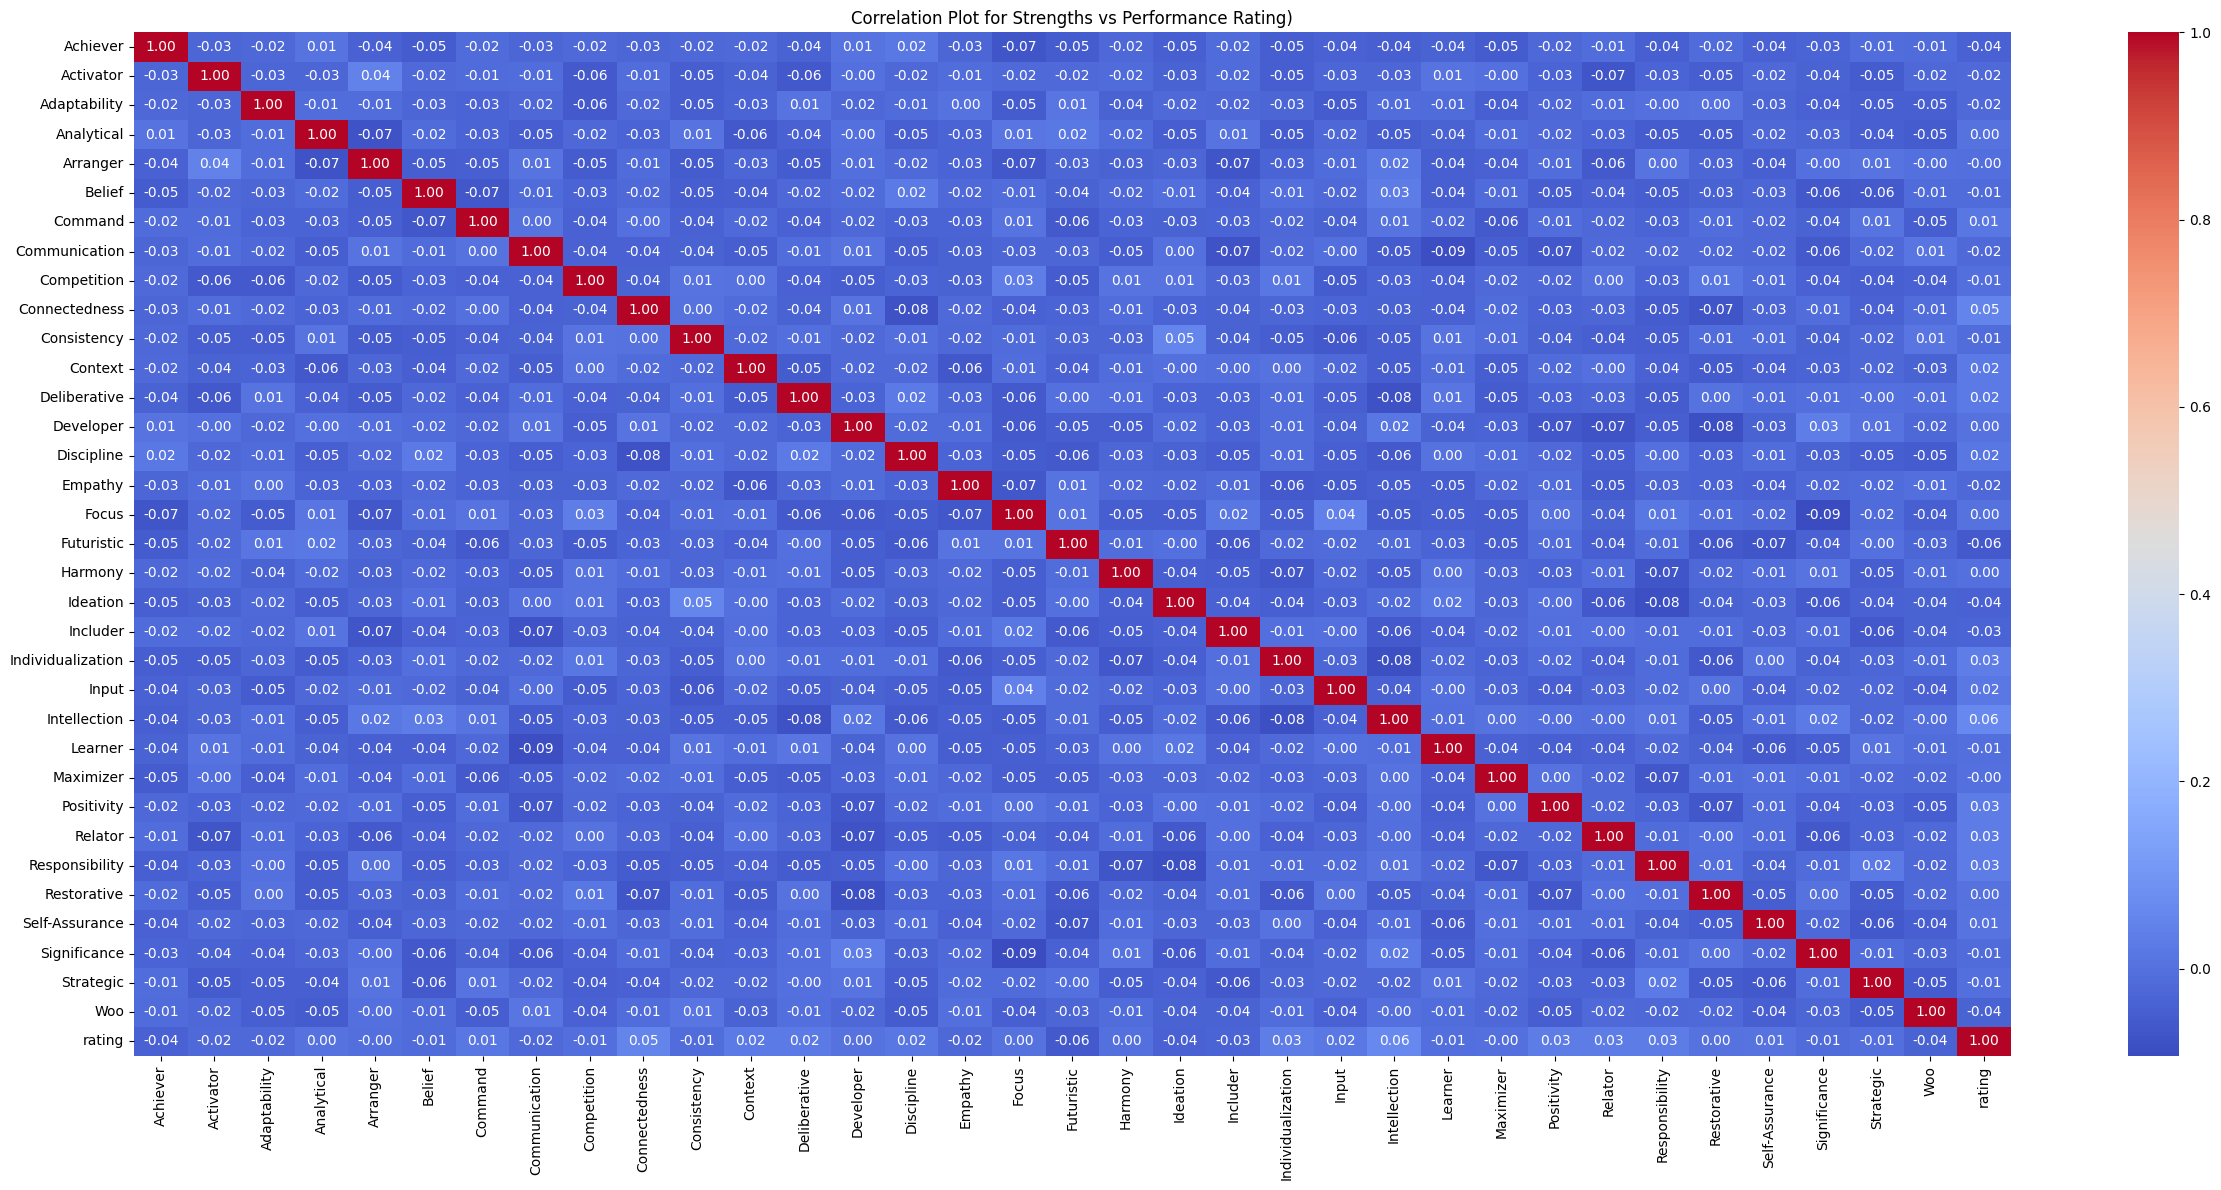

In [35]:
# Correlation Plot (strenghts consideration)
numeric_cols = merged_5b.drop(columns=['employee_id']).apply(pd.to_numeric, errors='coerce')
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(25,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot for Strengths vs Performance Rating)')
plt.tight_layout()
plt.show()

## **Relationship Between Performance Rating & Contextual Factors**

In [36]:
# Merge column
df9a = df9[['employee_id','rating']]
df8a = df8[['employee_id','company_id','area_id','position_id','department_id','division_id','directorate_id','grade_id',
            'education_id','major_id']]
merged_6 = df8a.merge(df9a[['employee_id','rating']],
                   on=['employee_id'],
                   how='left')
merged_6.head()

,employee_id,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,rating
0,EMP100000,1,4,1,6,3,3,2,3,1,2
1,EMP100000,1,4,1,6,3,3,2,3,1,3
2,EMP100000,1,4,1,6,3,3,2,3,1,1
3,EMP100000,1,4,1,6,3,3,2,3,1,3
4,EMP100000,1,4,1,6,3,3,2,3,1,3


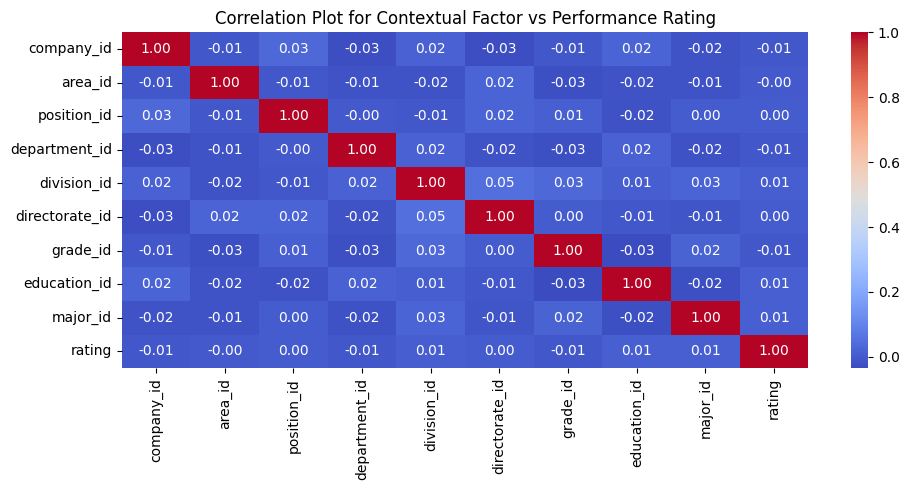

In [37]:
# Correlation Plot (employees consideration)
numeric_cols = merged_6.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot for Contextual Factor vs Performance Rating')
plt.tight_layout()
plt.show()

Intercept: 3.108105394223164

Coefficients:
company_id       -0.008871
area_id          -0.001625
position_id       0.001597
department_id    -0.004789
division_id       0.005990
directorate_id    0.004576
grade_id         -0.011686
education_id      0.010859
major_id          0.007112
dtype: float64

Regression Equation:
rating = 3.1081 - 0.0089*company_id - 0.0016*area_id + 0.0016*position_id - 0.0048*department_id + 0.0060*division_id + 0.0046*directorate_id - 0.0117*grade_id + 0.0109*education_id + 0.0071*major_id

Model Evaluation:
R² Score: 0.0006
Mean Squared Error: 1.0224


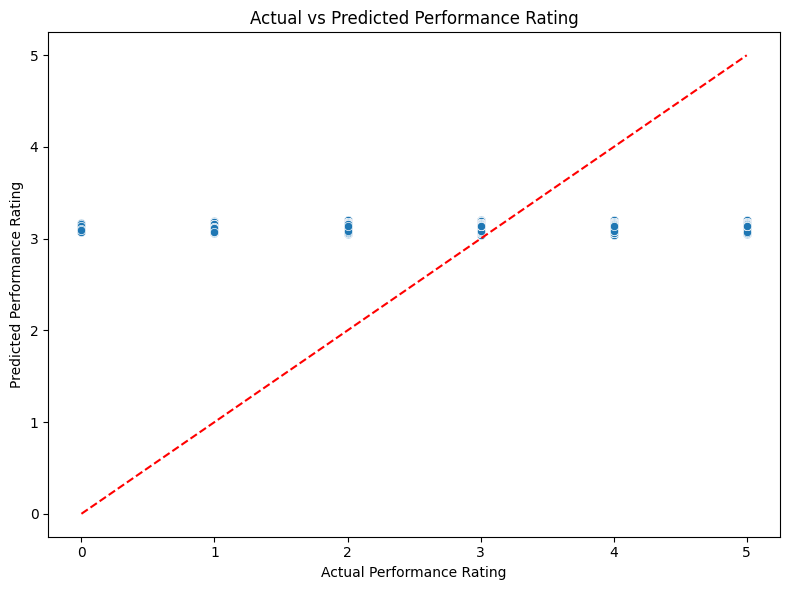

In [38]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg_6 = merged_6
numeric_cols = merged_6.drop(columns=['employee_id']).apply(pd.to_numeric, errors='coerce')

X = numeric_cols.drop(columns=['rating']).fillna(0)
y = numeric_cols['rating']

model = LinearRegression()
model.fit(X, y)
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_
regression_equation = f"rating = {intercept:.4f}"
for col, coef in coefficients.items():
    sign = '+' if coef >= 0 else '-'
    regression_equation += f" {sign} {abs(coef):.4f}*{col}"

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("Intercept:", intercept)
print("\nCoefficients:")
print(coefficients)
print("\nRegression Equation:")
print(regression_equation)
print("\nModel Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Performance Rating")
plt.ylabel("Predicted Performance Rating")
plt.title("Actual vs Predicted Performance Rating")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

In [39]:
# Merge column
df9b = df9[['employee_id','rating']]
df8b = df8[['employee_id','grade_id','education_id','years_of_service_months']]
merged_7 = df8b.merge(df9b[['employee_id','rating']],
                   on=['employee_id'],
                   how='left')
merged_7.head()

,employee_id,grade_id,education_id,years_of_service_months,rating
0,EMP100000,2,3,64,2
1,EMP100000,2,3,64,3
2,EMP100000,2,3,64,1
3,EMP100000,2,3,64,3
4,EMP100000,2,3,64,3


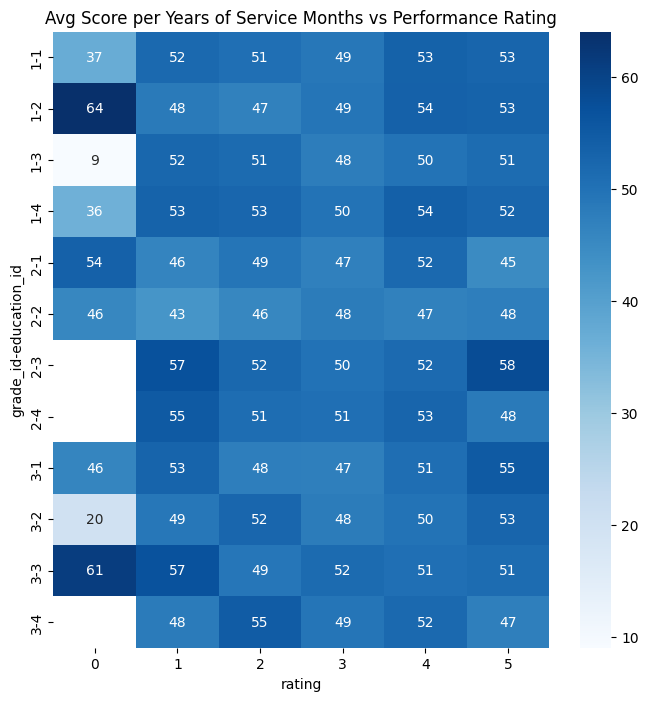

In [40]:
# Heatmap (years_of_service_months consideration)
pivot_7 = merged_7.pivot_table(index=['grade_id','education_id'],columns='rating',values='years_of_service_months',aggfunc='mean')
plt.figure(figsize=(8,8))
sns.heatmap(pivot_7, annot=True, cmap='Blues')
plt.title('Avg Score per Years of Service Months vs Performance Rating')
plt.show()

Intercept: 3.088774202456672

Coefficients:
grade_id                  -0.010528
education_id               0.009805
years_of_service_months    0.000691
dtype: float64

Regression Equation:
rating = 3.0888 - 0.0105*grade_id + 0.0098*education_id + 0.0007*years_of_service_months

Model Evaluation:
R² Score: 0.0005
Mean Squared Error: 1.0225


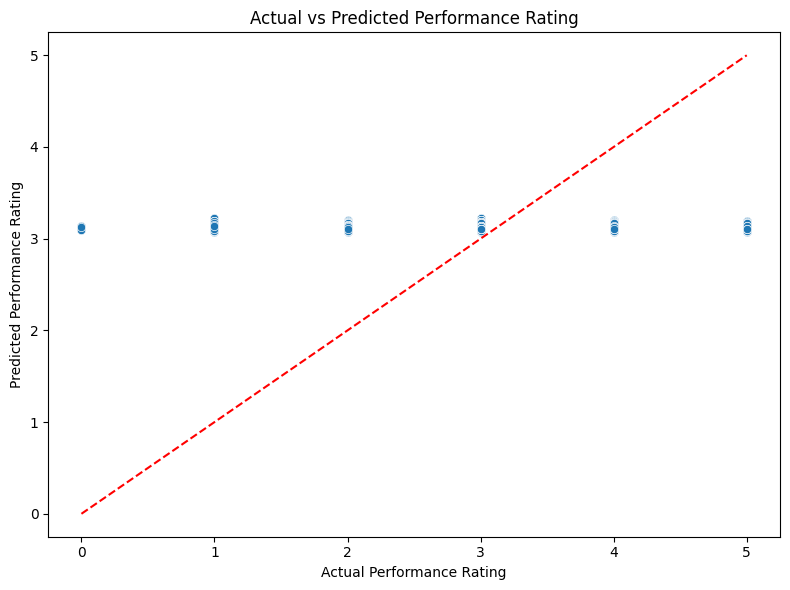

In [41]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg_7 = merged_7
numeric_cols = merged_7.drop(columns=['employee_id']).apply(pd.to_numeric, errors='coerce')

X = numeric_cols.drop(columns=['rating']).fillna(0)
y = numeric_cols['rating']

model = LinearRegression()
model.fit(X, y)
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_
regression_equation = f"rating = {intercept:.4f}"
for col, coef in coefficients.items():
    sign = '+' if coef >= 0 else '-'
    regression_equation += f" {sign} {abs(coef):.4f}*{col}"

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("Intercept:", intercept)
print("\nCoefficients:")
print(coefficients)
print("\nRegression Equation:")
print(regression_equation)
print("\nModel Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual Performance Rating")
plt.ylabel("Predicted Performance Rating")
plt.title("Actual vs Predicted Performance Rating")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

# **Part 2**

In [42]:
df_employee = df8.merge(df9a[['employee_id', 'rating']],on='employee_id',how='left')
df_employee.head()

,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months,rating
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64,2
1,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64,3
2,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64,1
3,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64,3
4,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64,3


In [43]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_1 = pd.crosstab(df_employee['company_id'], df_employee['rating'])
print(contingency_1)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_1)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating      0    1    2     3    4    5
company_id                             
1           5  152  377  1098  597  206
2           2  154  415  1186  663  240
3           5  184  383  1083  617  198
4           3  182  403  1080  560  257
Chi-square: 23.711958937765857
p-value: 0.07014916216689032
Result: There's no significant difference (p >= 0.05)


In [44]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_2 = pd.crosstab(df_employee['area_id'], df_employee['rating'])
print(contingency_2)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_2)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating   0    1    2     3    4    5
area_id                             
1        4  186  440  1164  678  238
2        3  160  361  1071  585  230
3        6  164  385  1109  561  220
4        2  162  392  1103  613  213
Chi-square: 9.678194104518752
p-value: 0.8394793704087404
Result: There's no significant difference (p >= 0.05)


In [45]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_3 = pd.crosstab(df_employee['position_id'], df_employee['rating'])
print(contingency_3)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_3)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating       0    1    2    3    4    5
position_id                            
1            2  124  228  720  399  132
2            1  106  279  734  404  146
3            3  108  281  767  390  161
4            4  111  278  767  473  172
5            3  106  255  759  378  149
6            2  117  257  700  393  141
Chi-square: 21.94433947540888
p-value: 0.6389561355959845
Result: There's no significant difference (p >= 0.05)


In [46]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_4 = pd.crosstab(df_employee['department_id'], df_employee['rating'])
print(contingency_4)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_4)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating         0    1    2    3    4    5
department_id                            
1              3  102  259  670  393  143
2              4  103  260  713  398  132
3              3  130  271  815  427  174
4              0   86  255  747  412  160
5              3  122  282  810  405  158
6              2  129  251  692  402  134
Chi-square: 25.46490592507356
p-value: 0.4365760343668506
Result: There's no significant difference (p >= 0.05)


In [47]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_5 = pd.crosstab(df_employee['division_id'], df_employee['rating'])
print(contingency_5)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_5)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating       0    1    2    3    4    5
division_id                            
1            4  151  291  856  460  163
2            2  117  308  880  474  194
3            0  142  340  905  483  190
4            2  145  318  886  495  179
5            7  117  321  920  525  175
Chi-square: 25.128152170770004
p-value: 0.19657223858030465
Result: There's no significant difference (p >= 0.05)


In [48]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_6 = pd.crosstab(df_employee['directorate_id'], df_employee['rating'])
print(contingency_6)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_6)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating          0    1    2     3    4    5
directorate_id                             
1               5  199  490  1417  782  272
2               5  237  530  1520  791  287
3               5  236  558  1510  864  342
Chi-square: 8.437815673932409
p-value: 0.5861525945732724
Result: There's no significant difference (p >= 0.05)


In [49]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_7 = pd.crosstab(df_employee['grade_id'], df_employee['rating'])
print(contingency_7)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_7)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating    0    1    2     3    4    5
grade_id                             
1         6  218  512  1492  839  313
2         5  238  546  1438  787  301
3         4  216  520  1517  811  287
Chi-square: 7.29176251090086
p-value: 0.6976434748263696
Result: There's no significant difference (p >= 0.05)


In [50]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_8 = pd.crosstab(df_employee['education_id'], df_employee['rating'])
print(contingency_8)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_8)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating        0    1    2     3    4    5
education_id                             
1             7  187  394  1134  671  197
2             5  174  402  1092  609  233
3             2  175  404  1179  605  265
4             1  136  378  1042  552  206
Chi-square: 25.546837058279927
p-value: 0.04306440910696621
Result: There's significant difference (p < 0.05)


In [51]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_9 = pd.crosstab(df_employee['major_id'], df_employee['rating'])
print(contingency_9)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_9)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating    0    1    2    3    4    5
major_id                            
1         2  104  262  697  389  136
2         4  105  290  694  389  133
3         3  136  288  816  419  178
4         2   97  236  734  407  164
5         2  111  251  783  420  148
6         2  119  251  723  413  142
Chi-square: 22.988814535369226
p-value: 0.5782165580450392
Result: There's no significant difference (p >= 0.05)


In [52]:
# Import library
from scipy.stats import kruskal

# Kruskal-wallis test
kruskal_1 = [df_employee[df_employee['rating'] == r]['years_of_service_months']
          for r in sorted(df_employee['rating'].dropna().unique())]

stat, p = kruskal(*kruskal_1)

print("Kruskal-Wallis Test for years_of_service_months vs rating")
print("Statistic:", stat)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

Kruskal-Wallis Test for years_of_service_months vs rating
Statistic: 20.625202877734914
p-value: 0.0009533220125176864
Result: There's significant difference (p < 0.05)


In [53]:
df_profiles1 = merged_3.copy()
df_profiles1.head()

,employee_id,pauli,faxtor,iq,gtq,tiki,rating
0,EMP100000,86,75,94,33,2,2
1,EMP100000,86,75,94,33,2,3
2,EMP100000,86,75,94,33,2,1
3,EMP100000,86,75,94,33,2,3
4,EMP100000,86,75,94,33,2,3


In [54]:
# Import library
from scipy.stats import kruskal

# Kruskal-wallis test
ratio_cols = ['pauli', 'faxtor', 'iq', 'gtq', 'tiki']
for col in ratio_cols:
    kruskal_2 = [df_profiles1[df_profiles1['rating'] == r][col]
              for r in sorted(df_profiles1['rating'].dropna().unique())]

    stat, p = kruskal(*kruskal_2)
    print(f"Kruskal-Wallis Test for {col} vs rating:")
    print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")
    if p < 0.05:
        print("Result: There's significant difference (p < 0.05)\n")
    else:
        print("Result: There's no significant difference (p >= 0.05)\n")

Kruskal-Wallis Test for pauli vs rating:
Statistic: 16.6539, p-value: 0.0052
Result: There's significant difference (p < 0.05)

Kruskal-Wallis Test for faxtor vs rating:
Statistic: 7.0480, p-value: 0.2171
Result: There's no significant difference (p >= 0.05)

Kruskal-Wallis Test for iq vs rating:
Statistic: 7.0910, p-value: 0.2140
Result: There's no significant difference (p >= 0.05)

Kruskal-Wallis Test for gtq vs rating:
Statistic: 5.0601, p-value: 0.4086
Result: There's no significant difference (p >= 0.05)

Kruskal-Wallis Test for tiki vs rating:
Statistic: 5.8039, p-value: 0.3258
Result: There's no significant difference (p >= 0.05)



In [55]:
# Spearman correlation test
cols_1 = ['rating', 'pauli', 'faxtor', 'iq', 'gtq', 'tiki']
spearman_1 = df_profiles1[cols_1].corr(method='spearman')

print("Spearman Correlation Matrix:")
print(spearman_1)

Spearman Correlation Matrix:
          rating     pauli    faxtor        iq       gtq      tiki
rating  1.000000  0.011262  0.013885 -0.018103  0.017129 -0.007667
pauli   0.011262  1.000000 -0.000301  0.004874  0.027208 -0.037213
faxtor  0.013885 -0.000301  1.000000 -0.042579 -0.031148 -0.013146
iq     -0.018103  0.004874 -0.042579  1.000000  0.000660  0.020546
gtq     0.017129  0.027208 -0.031148  0.000660  1.000000 -0.012977
tiki   -0.007667 -0.037213 -0.013146  0.020546 -0.012977  1.000000


In [56]:
df_profiles2 = merged_4.copy()
df_profiles2.head()

,employee_id,disc,mbti,rating
0,EMP100000,1,1,2
1,EMP100000,1,1,3
2,EMP100000,1,1,1
3,EMP100000,1,1,3
4,EMP100000,1,1,3


In [57]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_9 = pd.crosstab(df_profiles2['disc'], df_profiles2['rating'])
print(contingency_9)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_9)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating  0   1    2    3    4   5
disc                            
1       2  64  135  385  217  72
2       1  51  105  357  179  67
3       1  60  127  414  197  91
4       2  58  148  386  219  72
5       1  60  116  343  192  68
6       2  53  151  413  230  91
7       1  57  153  383  204  82
8       0  52  136  357  188  57
9       1  60  134  371  228  81
10      2  63  152  393  232  73
11      1  40  119  305  172  68
12      1  54  102  340  179  79
Chi-square: 35.465508314831524
p-value: 0.9811708952436909
Result: There's no significant difference (p >= 0.05)


In [58]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_10 = pd.crosstab(df_profiles2['mbti'], df_profiles2['rating'])
print(contingency_10)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_10)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating  0   1    2    3    4   5
mbti                            
1       2  68  141  454  247  98
2       0  44  115  304  195  67
3       2  45  104  280  150  59
4       0  43   95  264  135  53
5       0  40   75  225  129  46
6       1  49   94  232  123  46
7       1  49  122  355  187  71
8       2  45  103  253  157  55
9       3  39   95  238  145  55
10      0  29   94  252  159  46
11      0  41   84  247  131  52
12      0  39   98  268  130  55
13      2  41   90  247  129  51
14      0  34   74  219  108  45
15      1  31  100  272  134  47
16      1  35   94  337  178  55
Chi-square: 58.91264912715026
p-value: 0.9139964299539294
Result: There's no significant difference (p >= 0.05)


In [59]:
df_papi = merged_2.copy()
df_papi.head()

# Transpose data using pivot
pivot_papi = df_papi.pivot_table(index='employee_id',columns='scale_code',values='score',aggfunc='first',fill_value='')
pivot_papi = pivot_papi.reset_index()
pivot_papi

# Calculate rating per employee_id using median
rating_papi = df_papi.groupby('employee_id')['rating'].median().reset_index()
rating_papi.rename(columns={'rating': 'rating'}, inplace=True)
rating_papi['rating'] = rating_papi['rating'].round().astype(int)

# Combine with pivot data
df_papi = pivot_papi.merge(rating, on='employee_id', how='left')
df_papi.head()

,employee_id,Papi_A,Papi_B,Papi_C,Papi_D,Papi_E,Papi_F,Papi_G,Papi_I,Papi_K,...,Papi_O,Papi_P,Papi_R,Papi_S,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z,rating
0,DUP1942,6,5,1,4,3,5,4,1,3,...,3,5,7,9,9,1,8,3,5,3
1,DUP2096,1,6,9,3,4,1,2,6,9,...,4,4,6,8,2,6,3,8,2,3
2,DUP2722,2,5,6,4,1,4,9,9,1,...,2,5,6,1,7,3,6,3,3,3
3,DUP3015,5,4,3,4,9,2,8,9,1,...,1,8,7,3,5,5,3,5,3,4
4,DUP3452,7,9,1,9,7,3,5,2,1,...,5,4,2,9,5,9,1,6,4,3


In [60]:
# Import library
from scipy.stats import kruskal

# Kruskal-wallis test
cols_papi = [col for col in df_papi.columns if col.startswith('Papi_') or col == 'rating']
for col in cols_papi:
    kruskal_2 = [df_papi[df_papi['rating'] == r][col]
              for r in sorted(df_papi['rating'].dropna().unique())]

    stat, p = kruskal(*kruskal_2)
    print(f"Kruskal-Wallis Test for {col} vs rating:")
    print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")
    if p < 0.05:
        print("Result: There's significant difference (p < 0.05)\n")
    else:
        print("Result: There's no significant difference (p >= 0.05)\n")

Kruskal-Wallis Test for Papi_A vs rating:
Statistic: 4.7594, p-value: 0.3129
Result: There's no significant difference (p >= 0.05)

Kruskal-Wallis Test for Papi_B vs rating:
Statistic: 8.6720, p-value: 0.0698
Result: There's no significant difference (p >= 0.05)

Kruskal-Wallis Test for Papi_C vs rating:
Statistic: 6.1437, p-value: 0.1887
Result: There's no significant difference (p >= 0.05)

Kruskal-Wallis Test for Papi_D vs rating:
Statistic: 5.6272, p-value: 0.2288
Result: There's no significant difference (p >= 0.05)

Kruskal-Wallis Test for Papi_E vs rating:
Statistic: 7.2955, p-value: 0.1211
Result: There's no significant difference (p >= 0.05)

Kruskal-Wallis Test for Papi_F vs rating:
Statistic: 10.5109, p-value: 0.0326
Result: There's significant difference (p < 0.05)

Kruskal-Wallis Test for Papi_G vs rating:
Statistic: 0.6359, p-value: 0.9590
Result: There's no significant difference (p >= 0.05)

Kruskal-Wallis Test for Papi_I vs rating:
Statistic: 3.6670, p-value: 0.4529
Re

In [61]:
# Spearman correlation test
cols_papi = [col for col in df_papi.columns if col.startswith('Papi_') or col == 'rating']
spearman_2 = df_papi[cols_papi].corr(method='spearman')

print("Spearman Correlation Matrix:")
print(spearman_2)

Spearman Correlation Matrix:
          Papi_A    Papi_B    Papi_C    Papi_D    Papi_E    Papi_F    Papi_G  \
Papi_A  1.000000  0.014079  0.011514  0.015707  0.038764  0.034108  0.004819   
Papi_B  0.014079  1.000000  0.001654  0.005478  0.010043  0.007144  0.005330   
Papi_C  0.011514  0.001654  1.000000 -0.043425 -0.026950 -0.021892 -0.031959   
Papi_D  0.015707  0.005478 -0.043425  1.000000 -0.021963  0.007320 -0.028772   
Papi_E  0.038764  0.010043 -0.026950 -0.021963  1.000000 -0.037808 -0.003028   
Papi_F  0.034108  0.007144 -0.021892  0.007320 -0.037808  1.000000  0.026519   
Papi_G  0.004819  0.005330 -0.031959 -0.028772 -0.003028  0.026519  1.000000   
Papi_I -0.035983  0.029636 -0.014387  0.000075  0.023572  0.003824  0.032152   
Papi_K -0.033350 -0.032207 -0.016985  0.019398  0.008011 -0.006456 -0.023961   
Papi_L  0.021959  0.007469 -0.008401  0.013636 -0.052968  0.012172 -0.008005   
Papi_N -0.020585 -0.001853  0.018980 -0.021526  0.014812 -0.022129 -0.000689   
Papi_O -0.0

In [62]:
df_competencies = merged_1.copy()
df_competencies.head()

,employee_id,pillar_code,score,year,rating
0,EMP100000,GDR,2,2021,2
1,EMP100001,GDR,3,2021,3
2,EMP100002,GDR,1,2021,2
3,EMP100003,GDR,3,2021,3
4,EMP100004,GDR,3,2021,3


In [63]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_10 = pd.crosstab(df_competencies['pillar_code'], df_competencies['rating'])
print(contingency_10)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_10)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating        0    1     2     3     4    5
pillar_code                                
CEX          15  672  1578  4447  2437  901
CSI          15  672  1578  4447  2437  901
FTC          15  672  1578  4447  2437  901
GDR          15  672  1578  4447  2437  901
IDS          15  672  1578  4447  2437  901
LIE          15  672  1578  4447  2437  901
QDD          15  672  1578  4447  2437  901
SEA          15  672  1578  4447  2437  901
STO          15  672  1578  4447  2437  901
VCU          15  672  1578  4447  2437  901
Chi-square: 0.0
p-value: 1.0
Result: There's no significant difference (p >= 0.05)


In [64]:
# Import library
from scipy.stats import chi2_contingency

# Contingency table
contingency_11 = pd.crosstab(df_competencies['year'], df_competencies['rating'])
print(contingency_11)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_11)

print("Chi-square:", chi2)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

rating   0     1     2      3     4     5
year                                     
2021    30  1130  2820  10740  3980  1400
2022    20  1280  3070   8840  4980  1910
2023    40  1450  3210   8270  5130  2000
2024    40  1310  3230   8100  5420  2000
2025    20  1550  3450   8520  4860  1700
Chi-square: 1059.6517362978498
p-value: 7.318309040414284e-212
Result: There's significant difference (p < 0.05)


In [65]:
# Import library
from scipy.stats import kruskal

# Kruskal-wallis test
kruskal_com = [df_competencies[df_competencies['rating'] == r]['score']
          for r in sorted(df_competencies['rating'].dropna().unique())]

stat, p = kruskal(*kruskal_com)

print("Kruskal-Wallis Test for competencies vs rating")
print("Statistic:", stat)
print("p-value:", p)

alpha = 0.05
if p < alpha:
    print("Result: There's significant difference (p < 0.05)")
else:
    print("Result: There's no significant difference (p >= 0.05)")

Kruskal-Wallis Test for competencies vs rating
Statistic: 56012.6749819984
p-value: 0.0
Result: There's significant difference (p < 0.05)
